In [2]:
from numba import jit
from PIL import Image
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import random
%matplotlib inline
import pandas as pd

In [1]:
N    = 10 #dimensions of matrix
J1   = 2.3*10**(-3) #coupling constant in Ev
J2   = -21*10**(-3)
H    = 0 #magnetic field, must be set to 0 to compute observables 
counts = 1000
T    = (0.01) #temperature in K
k    = 8.6173303*10**(-5) #boltzmann constant in Ev/K
beta = 1/(k*T)

In [3]:
from statsmodels.tsa.stattools import acf
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
def initial_state_Nio(N): 
    state = np.random.choice([-1, 1], (N, N))
    state[::2, ::2] = 0
    state[1::2, 1::2] = 0
    return state
def diag_nbrs(i,j,N): 
    return [((i+1)%N,(j+1)%N),((i+1)%N,(j-1)%N),((i-1)%N,(j+1)%N),((i-1)%N,(j-1)%N)]

def lat_nbrs(i,j,N): 
    return [(i,(j+2)%N),(i,(j-2)%N),((i+2)%N, j),((i-2)%N, j)]



In [3]:
def Energy_Nio(state, J1, J2, H):
    J1   = 2.3*10**(-3) #diagonal
    J2   = -21*10**(-3) #lateral coupling
    E = 0
    N = state.shape[0]
    for x in range(N):
        for y in range(N):
            if (x-y)%2: # (x-y)%2 == 0 are oxygen atoms with no interaction
                nbrs = diag_nbrs(x,y,N)
                for nbr in nbrs:
                    E += -state[x,y]*J1*state[nbr[0],nbr[1]]
                nbrs = lat_nbrs(x,y,N)
                for nbr in nbrs:
                    E += -state[x,y]*J2*state[nbr[0],nbr[1]]
    E/=2
    E -= H*state.sum()
    return E

In [5]:
def calcMag(state):
    return np.sum(state)

In [6]:
def step_update_Nio(state, beta, J1, J2,H,energy,mag,N):
    J1   = 2.3*10**(-3) #diagonal
    J2   = -21*10**(-3) #lateral coupling
    for i in range(N**2): #1 step per state on average
        dE = 0
        x = random.randint(0,N-1)
        y = random.randint(0,N-1)
        if (x-y)%2:
            nbrs = diag_nbrs(x,y,N)
            for nbr in nbrs:
                dE += 2*state[x,y]*J1*state[nbr[0],nbr[1]]
            nbrs = lat_nbrs(x,y,N)
            for nbr in nbrs:
                dE += 2*state[x,y]*J2*state[nbr[0],nbr[1]]
            dE += 2*H*state[x,y]
            if (dE <= 0):
                if state[x,y] == 1:
                    mag-=2
                else:
                    mag+=2
                energy += dE
                state[x, y] *= -1
            else:
                r = random.uniform(0,1)
                tau = np.exp(-dE*beta)
                if (r < tau) :
                    if state[x,y] == 1:
                        mag-=2
                    else:
                        mag+=2
                    energy += dE
                    state[x, y] *= -1
    return state,energy,mag

In [7]:
def run_Nio(state, steps, N, beta, J1, J2,H):
    J1   = 2.3*10**(-3) 
    J2   = -21*10**(-3)
    E = np.zeros(steps)
    M = np.zeros(steps)
    energy = Energy_Nio(state, J1, J2,H)
    mag = calcMag(state)
    for i in range(steps):
        state,energy,mag = step_update_Nio(state, beta, J1, J2,H,energy,mag,N)
        E[i] = energy
        M[i]= mag
    plt.plot(E)
    plt.show()
    plt.plot(M)
    plt.show()
    return state,E,M

Starting from initial configuration:
[[ 0 -1  0 -1  0 -1  0  1  0  1  0 -1]
 [-1  0  1  0  1  0  1  0 -1  0  1  0]
 [ 0 -1  0 -1  0  1  0  1  0  1  0  1]
 [-1  0  1  0  1  0  1  0 -1  0  1  0]
 [ 0  1  0 -1  0  1  0  1  0 -1  0  1]
 [-1  0  1  0 -1  0 -1  0 -1  0  1  0]
 [ 0  1  0  1  0 -1  0 -1  0  1  0  1]
 [-1  0  1  0 -1  0  1  0 -1  0  1  0]
 [ 0  1  0  1  0 -1  0 -1  0  1  0  1]
 [ 1  0  1  0 -1  0 -1  0 -1  0  1  0]
 [ 0  1  0 -1  0 -1  0 -1  0  1  0 -1]
 [ 1  0  1  0  1  0 -1  0 -1  0 -1  0]]


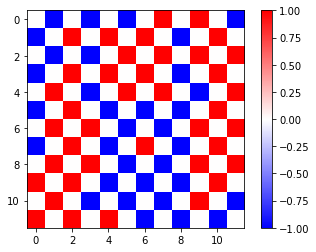

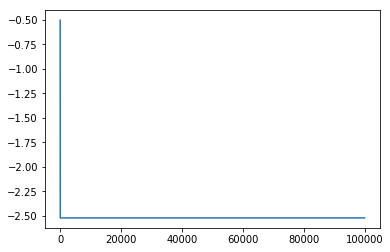

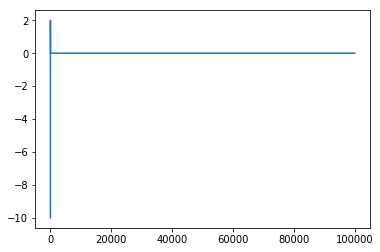

[[ 0 -1  0  1  0 -1  0  1  0 -1  0  1]
 [ 1  0 -1  0  1  0 -1  0  1  0 -1  0]
 [ 0  1  0 -1  0  1  0 -1  0  1  0 -1]
 [-1  0  1  0 -1  0  1  0 -1  0  1  0]
 [ 0 -1  0  1  0 -1  0  1  0 -1  0  1]
 [ 1  0 -1  0  1  0 -1  0  1  0 -1  0]
 [ 0  1  0 -1  0  1  0 -1  0  1  0 -1]
 [-1  0  1  0 -1  0  1  0 -1  0  1  0]
 [ 0 -1  0  1  0 -1  0  1  0 -1  0  1]
 [ 1  0 -1  0  1  0 -1  0  1  0 -1  0]
 [ 0  1  0 -1  0  1  0 -1  0  1  0 -1]
 [-1  0  1  0 -1  0  1  0 -1  0  1  0]]


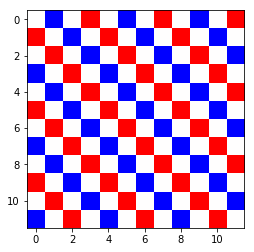

In [466]:
T = 0.001
beta = 1/(k*T)
N=12
state = initial_state_Nio(N)
steps = 100000
print ("Starting from initial configuration:")
print (state)
fig = plt.figure()
plt.imshow(state,cmap = 'bwr')
plt.colorbar()
plt.show()
state,ene,mag = run_Nio(state, steps, N, beta, J1, J2, H)
print (state)
plt.imshow(state,cmap='bwr') 
plt.show() 

In [4]:
N    = 12 #dimensions of matrix
J1   = 2.3*10**(-3) #coupling constant in Ev
J2   = -21*10**(-3)
H    = 0 #magnetic field, must be set to 0 to compute observables 
counts = int(1e5)
T_start = np.log(0.0001)
T_end = np.log(1e6)
T_cnt = 10
# T    = (0.01) #temperature in K
Ts = np.logspace(T_start,T_end,T_cnt) #can even make it linspace
k    = 8.6173303*10**(-5) #boltzmann constant in Ev/K
# beta = 1/(k*T)
states = np.zeros(shape=(T_cnt,N,N))
Ener1s,Mag1s = np.zeros(shape = (T_cnt,counts)), np.zeros(shape = (T_cnt,counts))

for i in range(Ts.size):
    T = Ts[i]
    beta = 1/(k*T)
    state = initial_state_Nio(N)
    # counts = 10000
    state,E,M = run_Nio(state, counts, N, beta, J1, J2, H)

    print (state)
    Ener1s[i] = E
    Mag1s[i] = M
    plt.imshow(state,cmap='bwr',interpolation="none") 
    plt.show() #plots last configuration

In [ ]:
mean_mag = Mag1s.mean(axis = 1)
err = Mag1s.var(axis = 1)

No handles with labels found to put in legend.


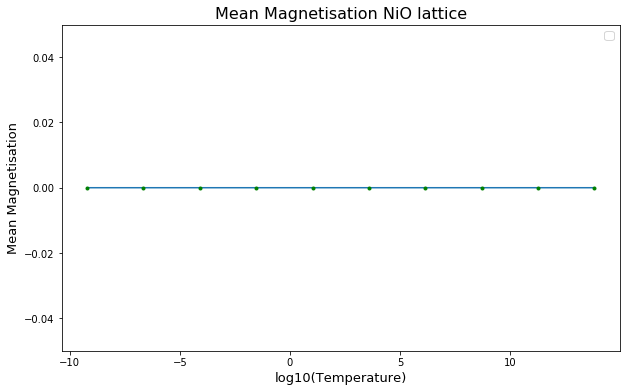

In [176]:
lattice = 'NiO'
figure = plt.figure(figsize = (10,6))
plt.plot(np.log10(Temps),mean_mag)
plt.errorbar(np.log10(Temps),mean_mag,err,color = 'g',fmt = '.', elinewidth=1) 

plt.title('Mean Magnetisation {} lattice'.format(lattice),fontsize = 16)
plt.xlabel('log10(Temperature)',fontsize = 13)
plt.ylabel('Mean Magnetisation',fontsize = 13)
plt.ylim([-0.05,0.05])
plt.legend(fontsize = 12)
plt.savefig(path + 'Mag made all zero zoom out Nio log temps -10 to 13')

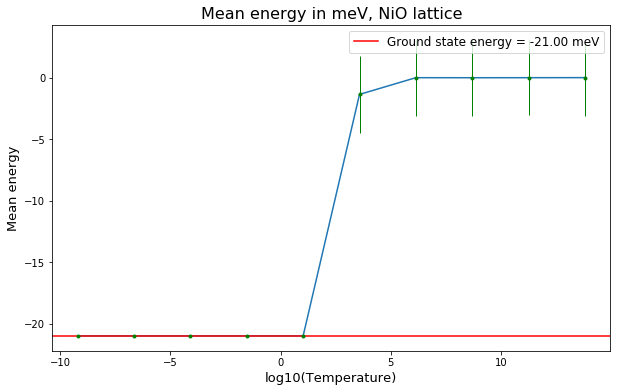

In [147]:
lattice = 'NiO'
figure = plt.figure(figsize = (10,6))
plt.plot(np.log10(Temps),Energ1s.mean(axis=1)*1000) #multiplied by 1000s to make it visible in mev
plt.errorbar(np.log10(Temps),Energ1s.mean(axis=1)*1000,(Energ1s*1000).var(axis=1),color = 'g',fmt = '.', elinewidth=1)
plt.title('Mean energy in meV, {} lattice'.format(lattice),fontsize = 16)
plt.xlabel('log10(Temperature)',fontsize = 13)
plt.ylabel('Mean energy',fontsize = 13)
plt.axhline(min(Energ1s.mean(axis=1))*1000, label = 'Ground state energy = {:.2f} meV'.format(min(Energ1s.mean(axis=1))*1000),color ='r')
plt.legend(fontsize = 12)
plt.savefig(path + 'energy Nio log temps -10 to 13')

In [17]:
path = 'G:/sem 8/kasi sir/ising/observed/'

## other time curves, not related to NiO

In [306]:
path1 = 'G:/sem 8/kasi sir/ising/observed/graphs/'  

In [403]:
df = pd.read_csv(path+'correln times wolff 2d slope 0.8.csv')

In [406]:
df.columns= ['ok','Ns','taus']

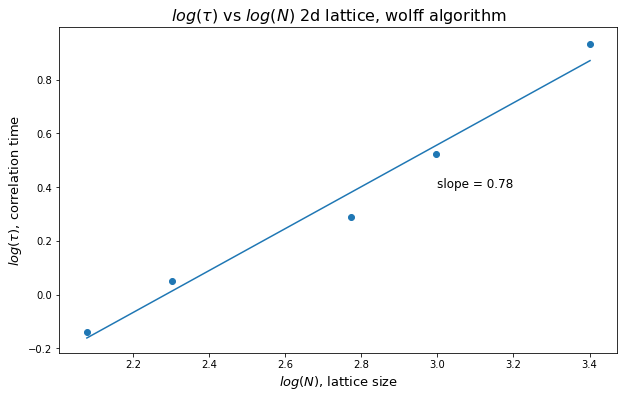

In [414]:
lattice = '2d'
figure = plt.figure(figsize = (10,6))
plt.scatter(np.log(df['Ns']),np.log(df['taus']))
# plt.plot(np.log(df['Ns']),np.log(df['taus']))
a,b = np.polyfit(np.log(df['Ns']),np.log(df['taus']),1)
x = np.array([np.log(df['Ns'][0]),np.log(df['Ns'][len(df['Ns'])-1])])
plt.plot(x,a*x+b)
plt.title(r'$log(\tau)$ vs $log(N)$ {} lattice, wolff algorithm'.format(lattice),fontsize = 16)
plt.xlabel(r'$log(N)$, lattice size',fontsize = 13)
plt.ylabel(r'$log(\tau)$, correlation time',fontsize = 13)
plt.text(3,.4,"slope = {:.2f}".format(a),fontsize = 12)
plt.savefig(path1+'wolff log tau vs log N {}'.format(lattice))

## taus for different temperatures

In [393]:
df = pd.read_csv(path+'correlation length vs temp 2d 10.csv')

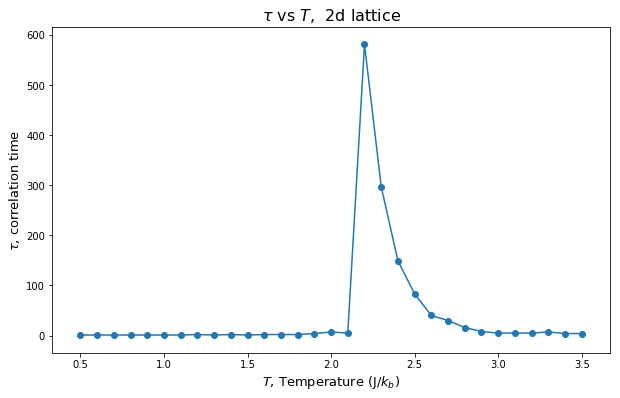

In [402]:
lattice = '2d'
figure = plt.figure(figsize = (10,6))
# plt.scatter(np.log(df['s']),np.log(df['taus']))
# a,b = np.polyfit(np.log(df['Ns']),np.log(df['taus']),1)
plt.plot(df['Temps'],df['taus'])
plt.scatter(df['Temps'],df['taus'])
# x = np.array([np.log(df['Ns'][0]),np.log(df['Ns'][len(df['Ns'])-1])])
# plt.plot(x,a*x+b)
plt.title(r'$\tau$ vs $T$,  {} lattice'.format(lattice),fontsize = 16);
plt.xlabel(r'$T$, Temperature (J/$k_b$)',fontsize = 13);
plt.ylabel(r'$\tau$, correlation time',fontsize = 13);
# plt.text(2.5,3.5,"slope = {:.2f}".format(a),fontsize = 12)
plt.savefig(path1+'tau vs temp 2d 10'.format(lattice))